In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

#Read in CSV file
admissions = pd.read_csv("admissions.csv")


   col       gpa         gre  actual_label
0    0  3.177277  594.102992           0.0
1    1  3.412655  631.528607           0.0
2    2  2.728097  553.714399           0.0
3    3  3.093559  551.089985           0.0
4    4  3.141923  537.184894           0.0


# Holdout Validation

In [5]:
import numpy as np
np.random.seed(8)

#Rename Column
admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

#Randomize entries
shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]

#Define Training and Testing Set
train = shuffled_admissions.iloc[range(0,515)]
test = shuffled_admissions.iloc[range(515,(shuffled_admissions.shape[0]))]

In [15]:
#Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

#Fit Logistic Model
lr = LogisticRegression()
lr.fit(train[['gre', 'gpa']], train['actual_label'])
test['predicted_label'] = lr.predict(test[['gre', 'gpa']])
matching_rows = (test['actual_label'] == test['predicted_label'])
correct_predictions = test[matching_rows]
accuracy = len(correct_predictions)/ len(test)
print (accuracy)

0.7731958762886598


In [16]:
#Calculate sensitivity and specificity
true_posi = (test['predicted_label'] == 1) & (test['actual_label'] == 1)
true_positives = test[true_posi]
false_posi = (test['predicted_label'] == 1) & (test['actual_label'] == 0)
false_positives = test[false_posi]
true_negi = (test['predicted_label'] == 0) & (test['actual_label'] == 0)
true_negatives = test[true_negi]
false_negi = (test['predicted_label'] == 0) & (test['actual_label'] == 1)
false_negatives = test[false_negi]

sensitivity = len(true_positives) / (len(true_positives)+len(false_negatives))
specificity = len(true_negatives) / (len(true_negatives)+len(false_positives))

print (sensitivity)
print (specificity)

0.10084033613445378
0.9918032786885246


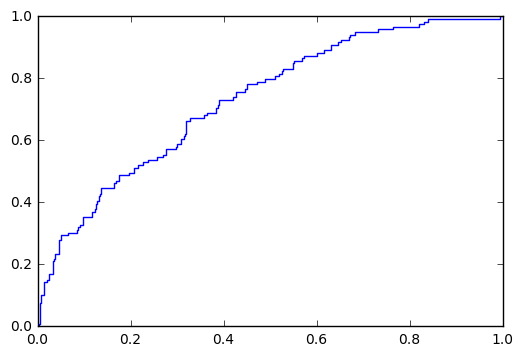

In [18]:
#Plot ROC curve
import matplotlib.pyplot as plt
import sklearn.metrics as scm

predictions = lr.predict_proba(test[['gre', 'gpa']])
fpr, tpr, thresholds = scm.roc_curve(test['actual_label'], predictions[:,1])

plt.plot(fpr, tpr)
plt.show()

In [22]:
#Print AUC 
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(test['actual_label'], predictions[:,1])
print (auc_score)

0.733365477338
